In [90]:
import matplotlib
del matplotlib.font_manager.weight_dict['roman']
matplotlib.font_manager._rebuild()

In [108]:
import numpy as np

L = 10
dx = 0.1
dt = 0.01
tmin = 0.0 
tmax = 5.0 #simulate time

#BCs
xmin = 0.0
xmax = L

c = 1.0 #propagation speed
C = (c*dt/dx)**2 #Courant constant

nx = int((xmax-xmin)/dx) + 1
nt = int((tmax-tmin)/dt) + 2

dX = np.arange(xmin, xmax+dx, dx)
u = np.zeros((nt,nx))

#ICs
u_0 = np.sin(2*np.pi*dX/L)
u_1 = np.zeros(nx)
u[0] = u_0
u[1] = u[0] + dt * u_1

#simulation
for t in range(1,nt-1):
    for x in range(1,nx-1):
        u[t+1,x] = 2*(1-C)*u[t,x]-u[t-1,x]+C*(u[t,x-1]+u[t,x+1])

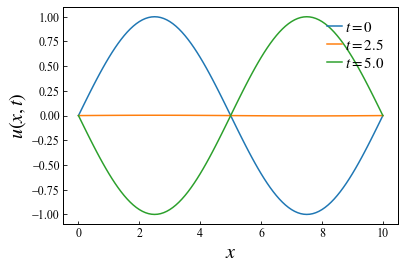

In [120]:
import matplotlib.pyplot as plt

#Draw
# plot
fig = plt.figure()
fig_1 = fig.add_subplot(111)
fig_2 = fig.add_subplot(111)
fig_3 = fig.add_subplot(111)
fig_1.plot(dX,u[0], label=r"$t = 0$")
fig_2.plot(dX,u[250], label=r"$t = 2.5$")
fig_3.plot(dX,u[500], label=r"$t = 5.0$")

plt.rcParams['font.family'] = 'Times New Roman' # font familyの設定
plt.rcParams['mathtext.fontset'] = 'stix' # math fontの設定
plt.rcParams["font.size"] = 15 # 全体のフォントサイズが変更されます。
plt.rcParams['xtick.labelsize'] = 12 # 軸だけ変更されます。
plt.rcParams['ytick.labelsize'] = 12 # 軸だけ変更されます
plt.rcParams['xtick.direction'] = 'in' # x axis in
plt.rcParams['ytick.direction'] = 'in' # y axis in 
plt.rcParams['axes.linewidth'] = 1.0 # axis line width
plt.rcParams['axes.grid'] = False # make grid
plt.rcParams["legend.fancybox"] = False # 丸角
plt.rcParams["legend.framealpha"] = 0 # 透明度の指定、0で塗りつぶしなし
plt.rcParams["legend.handlelength"] = 1 # 凡例の線の長さを調節
plt.rcParams["legend.labelspacing"] = 0.2 # 垂直方向（縦）の距離の各凡例の距離
plt.rcParams["legend.handletextpad"] = 0.2 # 凡例の線と文字の距離の長さ
plt.rcParams["legend.markerscale"] = 2 # 点がある場合のmarker scale
fig_1.set_xlabel(r"$x$")
fig_1.set_ylabel(r"$u(x,t)$")
fig_1.legend(loc=1)
plt.show()

# save
fig.savefig('wave_b.eps', bbox_inches="tight", pad_inches=0.05) 